In [2]:
%pip install pysindy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 12.4 MB/s eta 0:00:00


(x0)' = 1.000 x0 + -1.000 x0^2


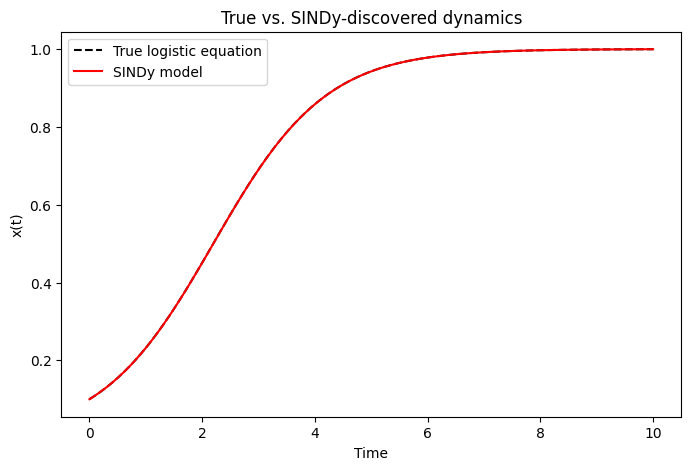

In [4]:
import numpy as np
import pysindy as ps
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ----------------------------
# Step 1. Generate logistic equation data
# ----------------------------
def logistic_equation(x, t, r):
    return r * x * (1 - x)  #our input equation

r = 1.0
t = np.linspace(0, 10, 100)
x0 = 0.1
x = odeint(logistic_equation, x0, t, args=(r,))

# ----------------------------
# Step 2. Fit SINDy model
# ----------------------------
model = ps.SINDy()
model.fit(x, t=t)
model.print()

# ----------------------------
# Step 3. Simulate with learned model
# ----------------------------
x_sim = model.simulate([x0], t)  # <-- fix: wrap initial condition in [ ]

# ----------------------------
# Step 4. Plot results
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(t, x, 'k--', label="True logistic equation")
plt.plot(t, x_sim, 'r', label="SINDy model")
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.legend()
plt.title("True vs. SINDy-discovered dynamics")
plt.show()
